# PCR via Classification

This has just been copied from experimental. Needs cleaning and whatever - K

## PCA

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



X_df = pd.read_csv("x_classification.csv")
y_df = pd.read_csv("y_classification.csv")
X_df.drop(columns='Unnamed: 0', inplace=True)
y_df.drop(columns='Unnamed: 0', inplace=True)

X_df.head()

,Gene_1.0,Gene_0.0,original_firstorder_InterquartileRange,original_firstorder_Skewness,Age,original_glszm_SizeZoneNonUniformityNormalized,original_firstorder_RobustMeanAbsoluteDeviation,original_shape_Sphericity,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,...,Proliferation_2.0,TrippleNegative_1.0,TumourStage_4,TumourStage_3,ChemoGrade_3.0,TrippleNegative_0.0,TumourStage_2,HistologyType_1.0,TumourStage_1,ChemoGrade_1.0
0,True,False,0.509910,0.545105,31.0,0.275749,0.231278,0.608183,0.503046,0.534549,...,False,True,False,False,False,False,True,True,False,False
1,True,False,0.740609,-0.792678,35.0,0.253014,0.309734,0.474509,0.399896,0.506185,...,False,True,False,True,True,False,False,True,False,False
2,True,False,0.787978,-0.732889,61.0,0.216409,0.324996,0.756228,0.473278,0.462282,...,False,False,False,False,False,True,True,True,False,False
3,True,False,1.074878,-0.051197,49.0,0.272800,0.447346,0.639376,0.501885,0.532369,...,False,True,False,True,True,False,False,True,False,False
4,True,False,0.976467,-0.136327,41.0,0.218492,0.407911,0.597820,0.558101,0.476326,...,True,True,False,False,True,False,True,True,False,False


In [3]:
y_df.head()

,pCR (outcome)
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# # Initialize PCA to keep 95% of the variance
# pca = PCA(n_components=0.95)  

# # Fit and transform the training data
# X_train_pca = pca.fit_transform(X_train)

# # Transform the test data
# X_test_pca = pca.transform(X_test)

# # Print explained variance ratio
# print("Explained variance ratio:", pca.explained_variance_ratio_)
# print("Number of components:", pca.n_components_)


In [8]:
# Train a classifier (e.g., Random Forest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy after PCA:", accuracy)


/home/michael/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model accuracy after PCA: 0.8461538461538461


In [9]:
from sklearn.metrics import balanced_accuracy_score

accuracy = balanced_accuracy_score(y_test, y_pred)
print("Model balanced accuracy after PCA:", accuracy)

Model balanced accuracy after PCA: 0.6


## PCA still needs work

In [ ]:


pca = PCA()
pca.fit(X_df)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative explained variance:", cumulative_variance)
print("Number of components:", pca.n_components_)


Cumulative explained variance: [0.98670284 0.99682247 0.99966366 0.99999997 0.99999999 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.

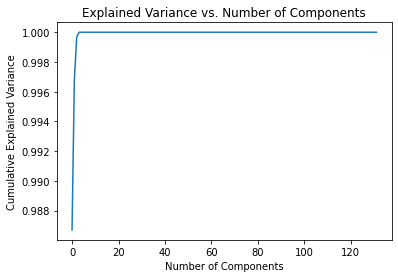

In [12]:
import matplotlib.pyplot as plt

plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()


# Model Development

Running Cross-Validation for LogisticRegression...


/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Model: LogisticRegression
Cross-Validation Accuracy Scores: [0.48979592 0.5        0.5        0.48958333 0.5       ]
Mean CV Accuracy: 0.4959
Standard Deviation of CV Accuracy: 0.0051

Running Cross-Validation for RandomForest...


/home/michael/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/michael/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/michael/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model: RandomForest
Cross-Validation Accuracy Scores: [0.55612245 0.66836735 0.59077381 0.5610119  0.57589286]
Mean CV Accuracy: 0.5904
Standard Deviation of CV Accuracy: 0.0408

Running Cross-Validation for GradientBoosting...


/home/michael/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

Model: GradientBoosting
Cross-Validation Accuracy Scores: [0.67857143 0.66326531 0.65178571 0.62202381 0.66220238]
Mean CV Accuracy: 0.6556
Standard Deviation of CV Accuracy: 0.0188

Running Cross-Validation for AdaBoost...
Model: AdaBoost
Cross-Validation Accuracy Scores: [0.58163265 0.70408163 0.54315476 0.7797619  0.55952381]
Mean CV Accuracy: 0.6336
Standard Deviation of CV Accuracy: 0.0924

Running Cross-Validation for SVC...
Model: SVC
Cross-Validation Accuracy Scores: [0.5 0.5 0.5 0.5 0.5]
Mean CV Accuracy: 0.5000
Standard Deviation of CV Accuracy: 0.0000

Running Cross-Validation for KNeighbors...


/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Model: KNeighbors
Cross-Validation Accuracy Scores: [0.56632653 0.53061224 0.54017857 0.55059524 0.5297619 ]
Mean CV Accuracy: 0.5435
Standard Deviation of CV Accuracy: 0.0137

Running Cross-Validation for DecisionTree...
Model: DecisionTree
Cross-Validation Accuracy Scores: [0.68367347 0.70408163 0.50744048 0.76934524 0.52380952]
Mean CV Accuracy: 0.6377
Standard Deviation of CV Accuracy: 0.1037

Running Cross-Validation for MLPClassifier...
Model: MLPClassifier
Cross-Validation Accuracy Scores: [0.44897959 0.44897959 0.5        0.48214286 0.5       ]
Mean CV Accuracy: 0.4760
Standard Deviation of CV Accuracy: 0.0230

Running Cross-Validation for XGBoost...


/home/michael/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversio

Model: XGBoost
Cross-Validation Accuracy Scores: [0.65816327 0.68877551 0.64732143 0.70386905 0.73363095]
Mean CV Accuracy: 0.6864
Standard Deviation of CV Accuracy: 0.0312



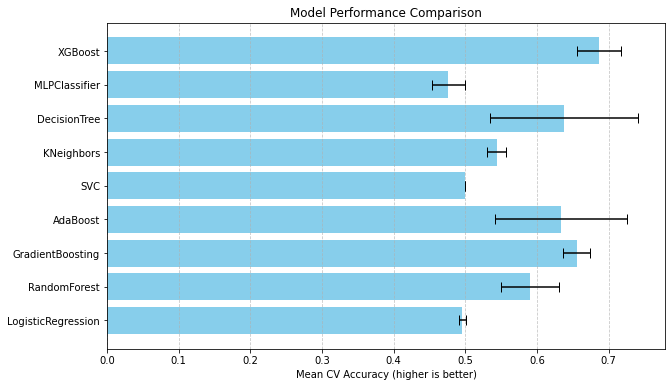

Best Model: XGBoost
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92        65
         1.0       0.62      0.38      0.48        13

    accuracy                           0.86        78
   macro avg       0.76      0.67      0.70        78
weighted avg       0.84      0.86      0.84        78



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.base import TransformerMixin


# Define different classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=500, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42),
    'SVC': SVC(kernel='rbf', probability=True, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'MLPClassifier': MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=500, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}


# Define a custom scoring metric (Accuracy in this case)
accuracy_scorer = make_scorer(balanced_accuracy_score)# Create pipelines for each classifier


results = {}

for classifier in classifiers.keys():
    print(f"Running Cross-Validation for {classifier}...")
    
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(classifiers[classifier], X_train, y_train, cv=5, scoring=accuracy_scorer, n_jobs=-1)
    
    # Store results
    results[classifier] = {
        'cv_scores': cv_scores,
        'cv_mean_accuracy': cv_scores.mean(),
        'cv_std_accuracy': cv_scores.std()
    }
    
    print(f"Model: {classifier}")
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
    print(f"Standard Deviation of CV Accuracy: {cv_scores.std():.4f}")
    print()

# Visualize results
model_names = list(results.keys())
cv_mean_accuracy = [results[name]['cv_mean_accuracy'] for name in model_names]
cv_std_accuracy = [results[name]['cv_std_accuracy'] for name in model_names]

# Bar plot for cross-validation results
plt.figure(figsize=(10, 6))
plt.barh(model_names, cv_mean_accuracy, xerr=cv_std_accuracy, color='skyblue', capsize=5)
plt.xlabel('Mean CV Balanced Accuracy (higher is better)')
plt.title('Model Performance Comparison')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Fit and evaluate the best model (based on mean accuracy) on the validation set
best_model_name = max(results, key=lambda name: results[name]['cv_mean_accuracy'])
best_pipeline = classifiers[best_model_name]
best_pipeline.fit(X_train, y_train)

# Predict on the validation set
y_pred = best_pipeline.predict(X_test)

# Print classification report
print(f"Best Model: {best_model_name}")
print(classification_report(y_test, y_pred))


## need to re do below graph with new data

In [ ]:
# from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, classification_report

# # Initialize a dictionary to store ROC data
# roc_data = {}

# # Loop through models and evaluate ROC AUC
# plt.figure(figsize=(10, 8))
# for classifier in classifiers.keys():
#     # Fit the pipeline
#     classifiers[classifier].fit(X_train, y_train)
    
#     # Get predicted probabilities or decision scores
#     if hasattr(classifiers[classifier], "predict_proba"):
#         y_scores = classifiers[classifier].predict_proba(X_test)[:, 1]
#     else:  # For classifiers like SVM, use decision_function
#         y_scores = classifiers[classifier].decision_function(X_test)
    
#     # Compute ROC curve and AUC
#     fpr, tpr, thresholds = roc_curve(y_test, y_scores)
#     roc_auc = auc(fpr, tpr)
#     roc_data[classifier] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}
    
#     # Plot the ROC curve
#     plt.plot(fpr, tpr, label=f"{classifier} (AUC = {roc_auc:.2f})")

# # Plot diagonal line for random guess
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')

# # Add labels, title, and legend
# plt.title('ROC Curves for Classifiers', fontsize=16)
# plt.xlabel('False Positive Rate', fontsize=12)
# plt.ylabel('True Positive Rate', fontsize=12)
# plt.legend(loc='lower right')
# plt.grid()
# plt.show()

# # Print classification reports for all models
# for classifier in classifiers.keys():
#     y_pred = classifiers[classifier].predict(X_train)
#     print(f"Classification Report for {classifier}:\n")
#     print(classification_report(y_test, y_pred))
#     print("-" * 60)

/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: continuous-multioutput format is not supported

<Figure size 720x576 with 0 Axes>